In [ ]:
# v1: normal view forecast

In [3]:
!pip install prophet

     |████████████████████████████████| 65 kB 748 kB/s eta 0:00:011
     |████████████████████████████████| 49 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 179 kB 3.6 MB/s eta 0:00:01
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6644013 sha256=b110c029935b182c58892578b0bd6852b5a32e01e7682e6e190de3e48d7d09a8
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [4]:
import prophet as p
import pandas as pd

In [5]:
import glob
g=glob.glob('../input/calfl1016combrts/sparce-all-rts-cal-fl-withfareclass.csv')

In [6]:
#!pip install openpyxl

In [7]:
df=pd.read_csv(g[0])
#m = p.Prophet()
#m.fit(df)
df.columns

Index(['Unnamed: 0', 'MktCoupons', 'Year', 'Quarter', 'BulkFare', 'Passengers',
       'MktFare', 'Pandemic', 'RPCarrier_9E', 'RPCarrier_AA', 'RPCarrier_AS',
       'RPCarrier_B6', 'RPCarrier_CP', 'RPCarrier_DL', 'RPCarrier_EV',
       'RPCarrier_F9', 'RPCarrier_G7', 'RPCarrier_HA', 'RPCarrier_MQ',
       'RPCarrier_NK', 'RPCarrier_OH', 'RPCarrier_OO', 'RPCarrier_QX',
       'RPCarrier_SY', 'RPCarrier_UA', 'RPCarrier_VX', 'RPCarrier_WN',
       'RPCarrier_YV', 'RPCarrier_YX', 'route_BUR-SFO', 'route_FLL-LAX',
       'route_FLL-SAN', 'route_FLL-SFO', 'route_LAX-FLL', 'route_LAX-MCO',
       'route_LAX-MIA', 'route_LAX-OAK', 'route_LAX-SFO', 'route_LAX-SJC',
       'route_LAX-SMF', 'route_LAX-TPA', 'route_MCO-LAX', 'route_MCO-SAN',
       'route_MCO-SFO', 'route_MCO-SMF', 'route_MIA-LAX', 'route_MIA-SFO',
       'route_OAK-LAX', 'route_PSP-SFO', 'route_SAN-MCO', 'route_SAN-SFO',
       'route_SAN-SJC', 'route_SAN-SMF', 'route_SAN-TPA', 'route_SFO-BUR',
       'route_SFO-FLL', 'route_SFO-

In [8]:
df1=df[["MktFare"]].copy()
df1.columns

Index(['MktFare'], dtype='object')

In [9]:
df.loc[df['Quarter'] == 1, 'month'] = 2
df.loc[df['Quarter'] == 2, 'month'] = 5
df.loc[df['Quarter'] == 3, 'month'] = 8
df.loc[df['Quarter'] == 4, 'month'] = 11


In [10]:
df['day']=1

In [11]:
df1['ds']=pd.to_datetime(df[['Year','month','day']])

In [12]:
df1.columns=['y','ds']

In [13]:
df1.head()

,y,ds
0,1338.27,2018-02-01
1,66.47,2018-02-01
2,5.54,2018-02-01
3,521.46,2018-02-01
4,1651.23,2018-02-01


In [14]:
m = p.Prophet()
m.fit(df1)

In [15]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
371,2021-07-28
372,2021-07-29
373,2021-07-30
374,2021-07-31
375,2021-08-01


In [16]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
371,2021-07-28,156.104509,-158.754008,491.452424
372,2021-07-29,128.281693,-166.154823,459.255533
373,2021-07-30,108.307655,-197.521098,469.326130
374,2021-07-31,96.565770,-231.168379,409.675853
375,2021-08-01,93.313938,-212.154563,428.087878


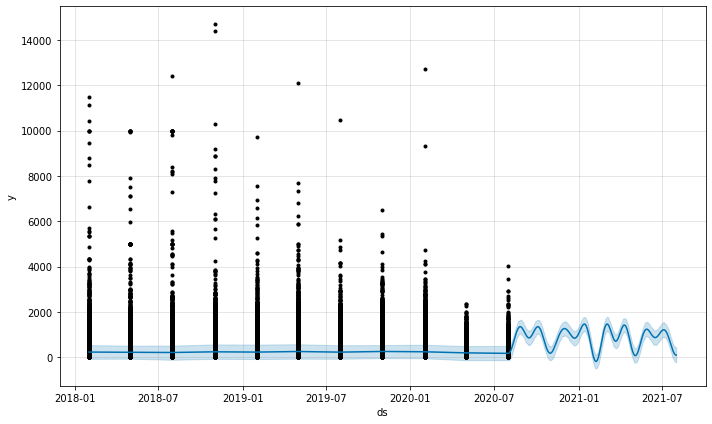

In [17]:
fig1 = m.plot(forecast)
